# Epsilon Greedy Method 

<br> <br> 


### Algorithm  
<br> 
Our goal is to maximize the total rewards and our limitation is that (in reality) we do not know each machine's win probability, so we choose the best machine. Therefore, to obtain these probabilities, we need to play with all machines. But how much we should explore? The actual aim is to strike a balance between exploration and exploitation. The algorithm's approach to doing this is whenever we want to play, decide between explore and exploit. The decision will be made by chance so that in each step, we generate a random number between 0 and 1, if the number is less than epsilon, we explore and vice versa.

<br> <br> 
### Program
<br> 
Let's say we are in a casino that has 4 machines and we are allowed to play 10000 times. Each time we select one of those machines and play with that. The rule is If the machine returns 1, we obtain 1 dollar and if it returns 0, we don't gain. So, we want to collect dollars as much as possible by applying the epsilon-greedy method. Therefore, the program should simulate us and machines. 
<br><br>
To do that we need to :<br><br>
1-  create a machine object. This object simulates a machine that does two functions. First, "pull" : returns 1 (win) with machine probability ("p") and second, "update" : updates the machine's success rate. 
<br><br>
2- Create 4 machines with 4 different win probabilities 
<br><br>
3 - Run the algorithm over a 10000-iteration period.
<br><br>
4- Demonstrate the results including:
 . the number of explorations
.  the number of exploitations
. the number of selecting the best machine
.  Total rewards
. overall win rate







In [97]:
import numpy as np
import matplotlib.pyplot as plt

In [133]:
# define epsilon , number of iterations and 4 different probabilities to create 4 machines
EPS = 0.1
IterNum = 10000
MachineProbability = [0.2, 0.8, 0.6, 0.5]
# for p in MachineProbability:
#    print(p)
# bestMachine = np.argmax(MachineProbability)
# print(bestMachine)

In [134]:
class Machine:
    def __init__ (self,p):
        self.p = p
        self.N = 0
        self.win_rate = 0
    def pull(self):
        return np.random.random() < self.p
    def update(self,x):
        self.N += 1
        self.win_rate = ((self.N - 1)* self.win_rate + x)/(self.N)

In [135]:
machines = [Machine(p) for p in MachineProbability]
exploreNum = 0 
exploitNum = 0
optimalExpNum = 0
rewards = np.zeros(IterNum)
optimalMachine = np.argmax([m.p for m in machines])
print(optimalMachine)
for m in machines:
     print(m.p)

1
0.2
0.8
0.6
0.5


In [136]:
for i in range(IterNum):
    randomNumber = np.random.random()
    if randomNumber < EPS: # explor
        exploreNum += 1
        selectedMachine = np.random.randint(len(machines))
        
    else:
        exploitNum += 1
        selectedMachine = np.argmax([m.win_rate for m in machines])
    
    if selectedMachine == optimalMachine:
        optimalExpNum += 1
    
    reward = machines[selectedMachine].pull()
    rewards[i] = reward
    machines[selectedMachine].update(reward)

In [137]:
for m in machines:
    print ("win rate for machine " + str(m.p) + " is " + str(m.win_rate))

win rate for machine 0.2 is 0.2021660649819495
win rate for machine 0.8 is 0.8011055712117918
win rate for machine 0.6 is 0.6091954022988505
win rate for machine 0.5 is 0.4957627118644069


In [138]:
print("Total rewards is equal to " + str(rewards.sum()))

Total rewards is equal to 7723.0


In [139]:
print("Overall win rate is " + str((rewards.sum()/IterNum)))

Overall win rate is 0.7723


In [140]:
print("The number of exploration is " + str(exploreNum))

The number of exploration is 1019


In [141]:
print("The number of exploitation is " + str(exploitNum))

The number of exploitation is 8981


In [142]:
print("We've chosen optimal machine " + str(optimalExpNum) + " times.")

We've chosen optimal machine 9226 times.


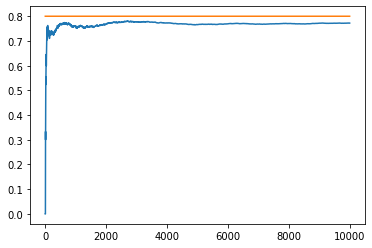

In [143]:
cumulative_rewards = np.cumsum(rewards)
cumulative_win_rate = cumulative_rewards / (np.arange(IterNum) + 1)
plt.plot(cumulative_win_rate)
plt.plot(np.ones(IterNum) * np.max(MachineProbability))
plt.show()